# **Project Name** - Play Store App Review Analysis

##### **Project Type**    - EDA(Exploratory Data Analysis)
##### **Contribution**    - Team
##### **Team Member 1 - Tejaswi Padarthi
##### **Team Member 2 - Bhasker Purimetla


# **Project Summary -**

We were given 2 datasets :

* **Play_store_data:** It contains the basic details of the app like number of user reviews, ratings, etc.
* **User reviews:** It contains the user reviews and its sentiment score for the respective app.

We need to explore and analyse the data to discover key factors responsible for app engagement and success.
for that i followed the below steps

*  Understanding the Proble statement
*  understanding the datasets.

*  cleaning the data.
*  Visualize the key insights.


Identified the factors that are influencing the app engagement sucess.



# **Github Link -**

In [ ]:
#https://github.com/BhaskarPurimitla8/EDA-Playsotre_App_Review_Analysis

# **Problem Satetment -**


This project aims to analyze two datasets: one containing basic information about Android apps (e.g., category, rating, size) and another containing user reviews for those apps. By examining these datasets, we seek to identify the key factors that significantly influence app engagement and success. Through this analysis, we will understand the relationship between app attributes, user sentiment,user retention, and user satisfaction. The insights gained will empower app developers to make data-driven decisions regarding app design, feature development, and user experience to improve app performance and achieve success in the competitive Android market.


# **Let's Begin -**

## **1.Know Your Data**

### Mounting the Drive


### Importing the required libraries

In [1]:
# importing libraries for data cleaning and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Reading the excel/csv file from the Drive.
data=pd.read_csv('/content/Play Store Data.csv')

### Dataset First View

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Rows and Columns count

In [5]:
data.shape

(10841, 13)

### Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Rows

In [7]:
data.duplicated().sum()

483

#### Missing Values/Null Values Count

In [8]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Text(0, 0.5, 'Number of Missing Values')

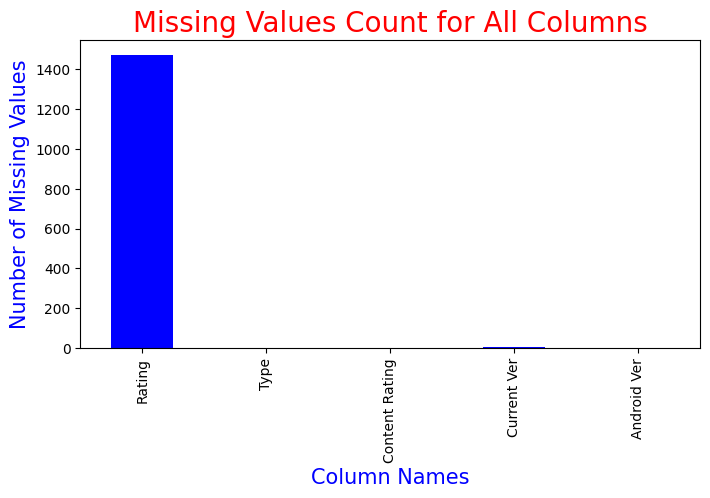

In [9]:
# finding the missing values in the dataset
missing_values = data.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Plot missing values count in a bar chart
plt.figure(figsize=(8,4))
missing_values.plot(kind='bar', color='blue')

# Adding labels and title
plt.title('Missing Values Count for All Columns',fontdict={'color':'red','fontsize':20})
plt.xlabel('Column Names',fontdict={'color':'blue','fontsize':15})
plt.ylabel('Number of Missing Values',fontdict={'color':'blue','fontsize':15})

## **2.Understading The Variables**

#### Dataset Columns

In [10]:
# view the column names in the datadrame
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
# viewing the statistical analysis for numerical columns.
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Variables Description



*  **App:** The Name of the Application.
*  **Category:** The Primary Category to which the App belongs (eg:games,Education).


* **Rating:** The overall user rating of the app represented as numeric value.
*  **Reviews:**The total number of user reviewa for the app.


*  **Size:** The Size of the app file (eg:20MB,500KB).
*   **Installs:**The total no.of times the app has been installed/downloaded by the users.
*  **Type:** The cost of the app if it is paid,it is represented as a 'Paid',if it is free,represented as 'Free'.
*   **Price:** The cost of the app,if it is paid,represented as numeric value,if the app is free,price will be 0.

*  **Content Rating**: The Age group the app is targeted at (eg:everyone,teen,adult).
*   **Genres:** Additional Categories or genres the app belongs to,apart from its main catrgory(eg:musical,family,game).

*  **Last Updated:** The date of the last updation of the app,represented in date format(eg:january 7,2023).
*  **Current ver:** Indicates the current version of the app
*   **Android Ver:** Indicates the android version of the app.






#### check unique values for each column

In [12]:
data.nunique()
# this will display the no.of unique values in each column.

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


###### **What Did i know about the dataset**


* After perdorming the above operations the dataset contains-

*  The dataset contains the information related to the different types of applications like name,file size,reviews ,rating etc..


* The playstore_data contains 10481 rows and 13 columns.
* There is only one numeric column that is 'Rating Column out of 13 columns.
* Data Contains 483 duplicate rows.

*  Rating,Type,Content Rating,Current Version,Android Version columns have some missing values







## **3.Data Wrangling**

*  Now we have to clean the data,we need to find the missing values/null values in each column and replace/remove those values.


*   Before that i want to delete the duplicated rows from the dataset.

#### **Removing Duplicates Rows**

In [13]:
# checking the duplicate rows.
data.duplicated().sum()

483

In [14]:
data[data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [15]:
# There are duplicate rows in the dataframe ,we have to remove those rows

data.drop_duplicates(inplace=True)

In [16]:
# check whether duplicates are removed or not
data.duplicated().sum()

0

In [17]:
len(data)

10358

In [18]:
data[data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [19]:
data.drop_duplicates(subset=['App'],inplace=True)


In [20]:
data[data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [21]:
print(len(data))

9660


#### **Cleaning The App Column**

In [22]:
# checking null values in the app column
print('null values:',data['App'].isnull().sum())
# checking the datatype
print('dtype:',data['App'].dtype)

null values: 0
dtype: object


In [23]:
data['App'].head(10)

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
5,Paper flowers instructions
6,Smoke Effect Photo Maker - Smoke Editor
7,Infinite Painter
8,Garden Coloring Book
9,Kids Paint Free - Drawing Fun


In [24]:
# to check if there are any invaid data like spelling mistatkes,lowercase or uppercase characters for same value.
data['App'].unique()[1:20]

array(['Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
       'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book',
       'Paper flowers instructions',
       'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter',
       'Garden Coloring Book', 'Kids Paint Free - Drawing Fun',
       'Text on Photo - Fonteee',
       'Name Art Photo Editor - Focus n Filters',
       'Tattoo Name On My Photo Editor', 'Mandala Coloring Book',
       '3D Color Pixel by Number - Sandbox Art Coloring',
       'Learn To Draw Kawaii Characters',
       'Photo Designer - Write your name with shapes',
       '350 Diy Room Decor Ideas', 'FlipaClip - Cartoon animation',
       'ibis Paint X'], dtype=object)



*  As there are no null/missing values in the App column,i am going to next column.



#### **Cleaning Category column**

In [27]:
# checking null values
print('null values:',data['Category'].isnull().sum())
#checking the datatype
print('dype:',data['Category'].dtype)

null values: 0
dype: object


In [28]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [29]:
# checking the no of rows having '1.9'
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
len(data)

9660

In [31]:
# there is only one record,we can remove that.
playstore_data = data[data['Category'] != '1.9']
len(playstore_data)

9659



*  There are no null/missing values and nothing to clean the data.

*  The datatype is also in the object format no need to chagne.






#### **Clening the Rating Column**

In [32]:
# checking null values
print('null values:',data['Rating'].isnull().sum())
# checking the datatype
print('dype:',data['Rating'].dtype)

null values: 1463
dype: float64


In [33]:
# printing the null values
print(data[data['Rating'].isnull()].head(10).to_string())

                                     App             Category  Rating Reviews  Size  Installs  Type Price Content Rating                           Genres        Last Updated Current Ver Android Ver
23                Mcqueen Coloring pages       ART_AND_DESIGN     NaN      61  7.0M  100,000+  Free     0       Everyone  Art & Design;Action & Adventure       March 7, 2018       1.0.0  4.1 and up
113            Wrinkles and rejuvenation               BEAUTY     NaN     182  5.7M  100,000+  Free     0   Everyone 10+                           Beauty  September 20, 2017           8  3.0 and up
123               Manicure - nail design               BEAUTY     NaN     119  3.7M   50,000+  Free     0       Everyone                           Beauty       July 23, 2018         1.3  4.1 and up
126         Skin Care and Natural Beauty               BEAUTY     NaN     654  7.4M  100,000+  Free     0           Teen                           Beauty       July 17, 2018        1.15  4.1 and up
129  Secre

In [34]:
# view the unique values
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])


*  rating column should contain the values between  1 and 5 .
*  if the values are beyond that ,we need to clean them.



In [35]:
# checking whether the values are less than 0 or not
print(data[data['Rating'] < 1])

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [36]:
#checking how many values are greater than 5
print(data[data['Rating'] > 5])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


*   There are missing values in this column,we have to fill them.
*   We do not know which one is better for filling the missing values.
*  For that i am grouping the data by category and will find the median rating of each category.


*  after that i will fill the null values with their corresponding mean.


In [37]:
#finding the mean of each category
median_ratings = data.groupby('Category')['Rating'].median().round(1)
median_ratings

,Rating
Category,
1.9,19.0
ART_AND_DESIGN,4.4
AUTO_AND_VEHICLES,4.3
BEAUTY,4.3
BOOKS_AND_REFERENCE,4.5
BUSINESS,4.2
COMICS,4.4
COMMUNICATION,4.2
DATING,4.1


In [38]:
# Replacing null values with median of the column
data['Rating'] = data['Rating'].fillna(data['Category'].map(median_ratings))

In [39]:
# check for null values after replacing the values
print(data['Rating'].isnull().sum())

0


In [40]:
# to ensure that any other rows are affected or not
print(len(data['Rating']))
print(len(data))

9660
9660


#### **Cleaning Reviews Column**

In [41]:
# check for null values and datatype
print('null values:',data['Reviews'].isnull().sum())
print('data type:',data['Reviews'].dtype)

null values: 0
data type: object


In [42]:
#checking for unique values
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)



*   Reviews column datatype is object,we have to convert this into float



In [43]:
# convert the data type to numeri
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

In [44]:
# checking the range of values
data['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [45]:
print(data['Reviews'].head(10))
print('Null values:',data['Reviews'].isnull().sum())


0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
5       167.0
6       178.0
7     36815.0
8     13791.0
9       121.0
Name: Reviews, dtype: float64
Null values: 1


In [46]:
len(data)

9660

#### **Cleaning Size Column**

In [47]:
# checking null values
print('null values:',data['Size'].isnull().sum())
# datatype
print('datatype:',data['Size'].dtype)

null values: 0
datatype: object


In [48]:
print(data['Size'].head(40))

0                    19M
1                    14M
2                   8.7M
3                    25M
4                   2.8M
5                   5.6M
6                    19M
7                    29M
8                    33M
9                   3.1M
10                   28M
11                   12M
12                   20M
13                   21M
14                   37M
15                  2.7M
16                  5.5M
17                   17M
18                   39M
19                   31M
20                   14M
21                   12M
22                  4.2M
23                  7.0M
24                   23M
25                  6.0M
26                   25M
27                  6.1M
28                  4.6M
29                  4.2M
30                  9.2M
31                  5.2M
32                   11M
33                   11M
34                  4.2M
35                  9.2M
36                   24M
37    Varies with device
38                   11M
39                  9.4M




*  Size column contains the valies like, 200K,20M like that.

* it is better to convert them into one format like all values should be in MB's or all should be in KB's
*   List item

* For this i want to convert the data like into MB's.


In [49]:
data[data['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471.0,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8.0,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622.0,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [50]:
# function to convert into MB's
def convert_to_mb(value):
    value = str(value)

    if value.lower() == 'varies with device':
        return value
    if value.endswith('M'):
        return float(value[:-1])
    elif value.endswith('k'):
        return round(float(value[:-1]) / 1000 ,1) # Convert KB to MB and add "MB"
    else:
        return None

data['Size'] = data['Size'].map(convert_to_mb)
data['Size'].head()

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


#### **Installs column**

In [51]:
# checking for null values
print('Null values:',data['Installs'].isnull().sum())
# printing the datatype
print('dtype:',data['Installs'].dtype)
print(len(data))

Null values: 0
dtype: object
9660


In [52]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [53]:
# removing the + symbol
data['Installs']=data['Installs'].str.replace('+','',regex=False)

# removing the commas
data['Installs']=data['Installs'].str.replace(',','',regex=False)

# checking whether removed ot not
print(data['Installs'].head())
print('datatype',data['Installs'].dtype)

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object
datatype object




*  No of installations should be numeric format.we have to change the datatype of the installs column.



In [54]:
# converting the column into numeric data type.
data['Installs']=pd.to_numeric(data['Installs'],errors='coerce')
data['Installs'].head()

,Installs
0,10000.0
1,500000.0
2,5000000.0
3,50000000.0
4,100000.0


#### **Type column**

In [55]:
print('null values:',data['Type'].isnull().sum())
print(data['Type'].unique())

null values: 1
['Free' 'Paid' nan '0']




*  There is only one missed value
*  so i am replacing that value with the most repeating value in the column.

*  for that i will use mode.





In [56]:
# finding the mode of the type column.
type_mode=data['Type'].mode()
type_mode[0]

'Free'

In [57]:
# filling the null values with mode
data['Type']=data['Type'].fillna(type_mode[0])
data['Type'].isnull().sum()

0

#### **Price column**

In [58]:
print('null values:',data['Price'].isnull().sum())
print('dtype ',data['Price'].dtype)

null values: 0
dtype  object




*   There are no null values in the price column.
*  But the datatype is object.the price column should be in numeric format.

*  so we need to change the datatype.
*  For that we need to remove the '$' symbol before values.


In [59]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [60]:
# Removing the '$' symbol
data['Price'] = data['Price'].replace({'\$': ''}, regex=True)

# Converting to numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [61]:
data['Price'].dtype

dtype('float64')

In [62]:
print(len(data))
print(len(data['Price']))

9660
9660


#### **Content Rating**

In [63]:
# chekcing the null values
print('Null:',data['Content Rating'].isnull().sum())
# cehcking the datatype
print('dtype:',data['Content Rating'].dtype)

Null: 1
dtype: object


In [64]:
data['Content Rating'].head()

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone


In [65]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

#### **Genres**

In [66]:
print('Null values:',data['Genres'].isnull().sum())
print('dtype:',data['Genres'].dtype)

Null values: 0
dtype: object


In [67]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

#### **Last Updated Column**

In [68]:
# checking null values in last updated column
print('Null values:',data['Last Updated'].isnull().sum())
print(data['Last Updated'].dtype)

Null values: 0
object


*  Last Updated Column indicates the date of lastest updated version.
* This may not useful for our analysis.we can delete this.

In [69]:
# removing the last updated column.
data=data.drop(columns=['Last Updated'])
print(data.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')


In [70]:
# checking whether the column is deleted or not.
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')

##### **Current Ver column**

In [71]:
# chekcing the null values
print('null values:',data['Current Ver'].isnull().sum())
#chekcing the datatype
print('datatype:',data['Android Ver'].dtype)

null values: 8
datatype: object




*  They are fewer null values in this column,and they may not contribute to analysis.

*  so I am just simply deleting the null values.






In [72]:
# deleting null values.
data.dropna(subset=['Current Ver'],inplace=True)

In [73]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

##### **Android Ver Column**

In [74]:
# checking null values in Android Ver column
print('Null values:',data['Android Ver'].isnull().sum())
print(data['Android Ver'].dtype)

Null values: 3
object


In [75]:
# deleting null values
data.dropna(subset=['Android Ver'],inplace=True)

In [76]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [77]:
# finally checking the remaining length of the dataset.
len(data)

9649

#### **Reviews Dataset**

In [78]:
# reading dataset
df=pd.read_csv('/content/User Reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [79]:
#checking columns
df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

Dataset Columns

*   **App:** Name of the mobile application being reviewed.

*   **Translated_Review:** Thhe user review of the app which has been preprocessed(cleaned,tokenized) translated into English.

*   **Sentiment:** the sentiment of the user review ,categorized as positive,negative and neutral.
*  **Sentiment_polarity:** A numeric score representing the polarity of the review, ranging from -1 to 1.

*   **Sentiment_Subjectivity:** A numeric score representing the subjectivity of the review,ranging from 0 to 1,showing how subjective or opinion based review.




In [80]:
# checking the shape of the dataframe
df.shape

(64295, 5)

In [82]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [83]:
# statistical review of the columns
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [84]:
# checking null values in the column.
df.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863




*   the 4 columns except App column ,,have null values,and there is no dependency between columns
*  this is inconsitent data,we can remove those rows.



In [86]:
# removing the null values in the sentiment,sentiment_polarity,entiment_subjectivity columns.
df.dropna(subset=['Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],inplace=True)

In [87]:
# checking whether null values are removed or not
df.isnull().sum()

,0
App,0
Translated_Review,5
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0




*  Column Transalted review may not useful for our analysis.because the sentiment,sentiment_polarity columns,snetiment_subjectivity columns are derrived from the transalted review column.
*  I am removing that column.



In [88]:
# removing the Transalted_review column
df=df.drop(columns=['Translated_Review'])

In [91]:
df.columns

Index(['App', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], dtype='object')

In [92]:
# checking the final length of the dataset
len(df)

37432

### What all manipulations have you done and insights you found?



*  Removed the duplicate records based on the 'APP' column.
* Cleaned null values in ratings column with mean of their correspondong category.

*  converted the Reviews column to float.
*   In size column Replaced the missing values with the median of their corresponding category,and cnoverted all the values in to MB's.

* in the installs column removed the '+' and  ',' and converted into numerical dtype.
*  In type column filled the missing values with mode of the column.


*   in price column removed the $ symbol and converted into float datatype.
*  In content Rating column filled the values with mode.


*  Deleted the Last updated column
* deleted null values in Current ver,Android Ver columns.
*  Removed duplicate rows in Reviews dataset.


* In reviews dataset translated_review,sentiment,sentiment_polarity,sentiment_subjectivity have null values,they are not valid in the dataset,so i removed the null values.
* deleted the translated review column.


*  Added the column for sentiment to convert into numerical in the reviews data.

*  Added the Revenue column in the playstore_data.
* Added Size_group column for creating size intervals.
















## **4.Visualization**

#### 2.Number of Apps in each category

<ipython-input-93-e5955dc0a5d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index,x=category_counts.values,  palette='Set1')


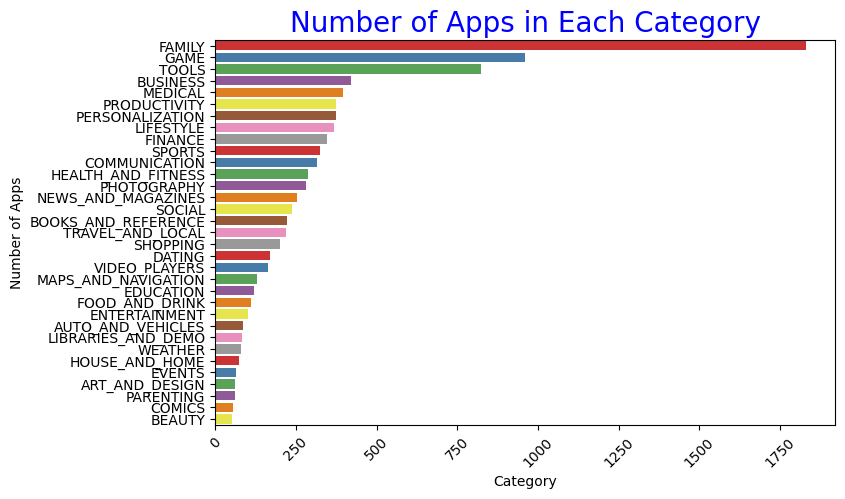

In [93]:

category_counts = data['Category'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(y=category_counts.index,x=category_counts.values,  palette='Set1')
# for index, value in enumerate(category_counts.values):
#     plt.text(value + 1, index, str(value), va='center')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category',fontdict={'color':'blue','size':20})
plt.xticks(rotation=45)
plt.show()


*  High app counts in categories like 'Family' suggest popularity but also high competition and market saturation.
*   Categories with fewer apps, such as 'COMICS' and 'EVENTS', indicate opportunities for innovation in less crowded markets.





#### 3.Free Apps vs Paid Apps

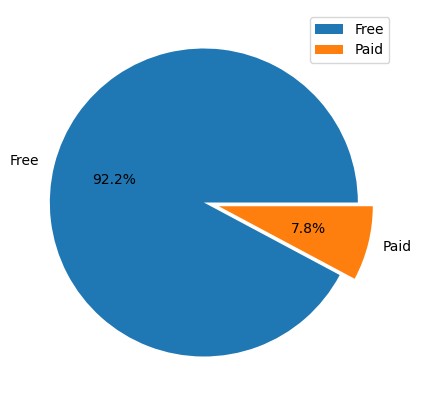

In [94]:
free_apps=data['Type'].value_counts()
label=free_apps.index
values=free_apps.values
plt.figure(figsize=(8,5))
plt.pie(values,labels=label,autopct='%1.1f%%',explode=[0, 0.1])
plt.legend()
#plt.title('Types of Apps',fontdict={'color':'blue','size':20})
plt.show()


*  majority of apps (92.2%) are free, suggesting that most developers prefer offering free apps to attract more users, including through ads.

*  Only 7.8% of the apps are paid, which indicates that paid apps are a small segment of the market, especially  to users who are willing to pay for premium features for their work.



Distribution of app rating

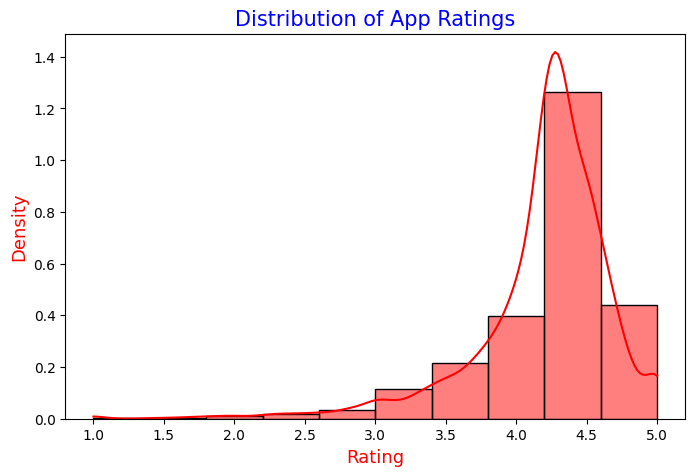

In [ ]:
ratings=data['Rating']
plt.figure(figsize=(8,5))

sns.histplot(ratings,bins=10,kde=True,color='red',stat='density')

plt.title('Distribution of App Ratings', fontdict={'color':'blue','fontsize':15})
plt.xlabel('Rating', fontdict={'color':'red','fontsize':13})
plt.ylabel('Density', fontdict={'color':'red','fontsize':13})
plt.show()

##### **insight**


* the histogram shows that the majority of ratings are concentrated between 4 and 4.5 stars.

* we can conclude that most users rate the app positively. This insight can help in identifying user satisfaction levels.







#### 8.Distribution of ratings across different categories

<ipython-input-821-1385c018230f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=playstore_data, palette='Set2')


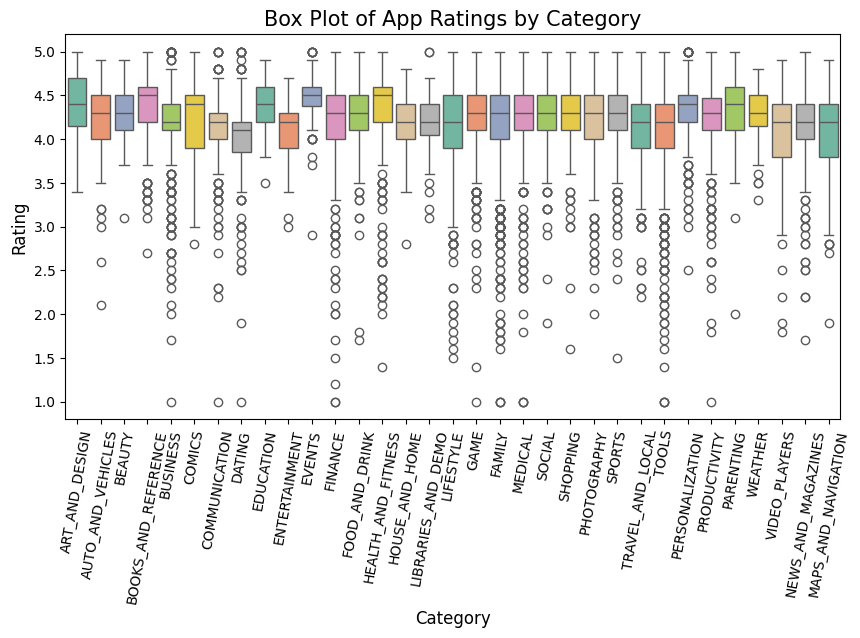

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Rating', data=playstore_data, palette='Set2')

plt.title('Box Plot of App Ratings by Category', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=80)
plt.show()

##### insight


*  The box plot shows which categories have higher median ratings, indicating better overall satisfaction, and which have greater variability in ratings, suggesting mixed user opinions.





#### 9.Pie chart for Content Rating distribution.

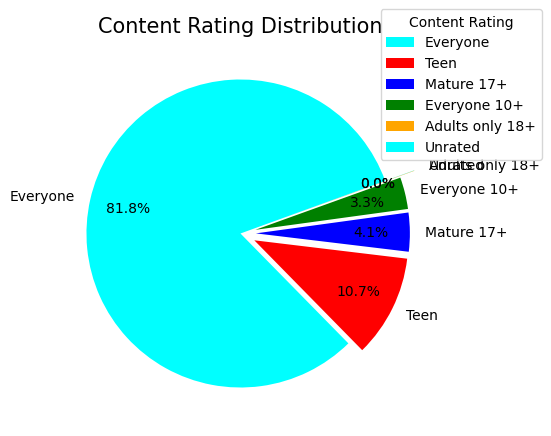

In [ ]:
content_rating_counts = playstore_data['Content Rating'].value_counts()


plt.figure(figsize=(8, 5))
plt.pie(content_rating_counts, labels=content_rating_counts.index,
        autopct='%1.1f%%', startangle=20,
        pctdistance=0.75,
        explode=[0.0,0.1,0.1,0.1,0.2,0.2],
        colors=['cyan','red','blue','green','orange'])
plt.title('Content Rating Distribution', fontsize=15)
plt.legend( loc='upper right',bbox_to_anchor=(1.3, 1.1), title="Content Rating")
plt.show()


*  The majority of apps targeting "Everyone" indicate that app developers are focusing on a wide audience, including all age groups.



*  We can see that Adults only 18+,unrated people gave better rating compared to others.




* The sizes of the majority of the apps range in between 1 and 20 MB.
* There are a good number of apps whose size varies with the device.
* The apps which are smaller in size on average have lower no of app installs and user reviews.

#### 13.Top 10 Genres

<ipython-input-816-b15c4517fddb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='Set2',width=0.4)


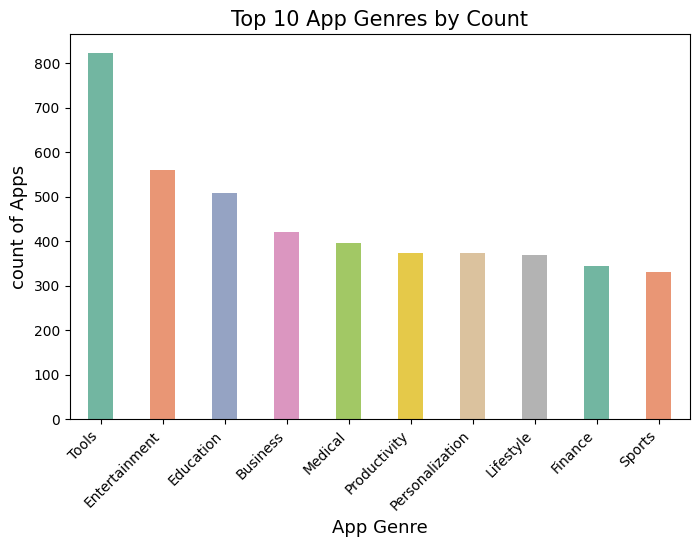

In [ ]:
top_10_genres = playstore_data['Genres'].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='Set2',width=0.4)

plt.title('Top 10 App Genres by Count', fontsize=15)
plt.xlabel('App Genre', fontsize=13)
plt.ylabel('count of Apps', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.show()

##### **insight**


*  We can see the top 10 genres.

*  From this graph we can observe that Most of the apps are related to the above genres in the playstore.

*  so the developers should focus on the remaining genres to develop new applications.





#### 15.Price distribution


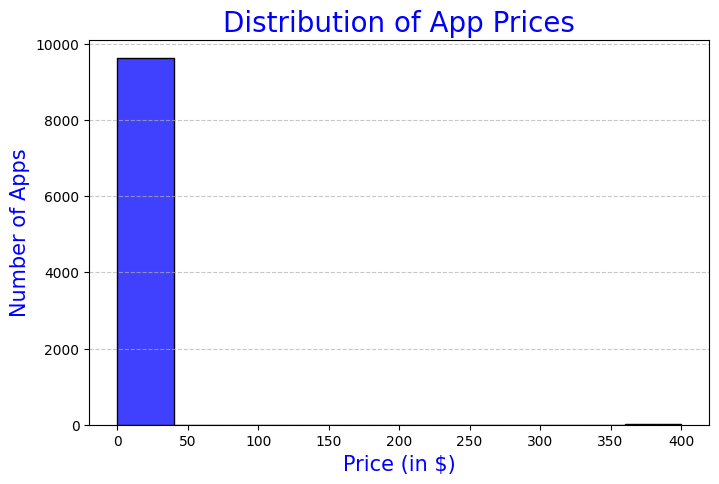

In [ ]:
playstore_data['Price'] = playstore_data['Price']

plt.figure(figsize=(8, 5))
sns.histplot(playstore_data['Price'], bins=10, kde=False, color='blue', edgecolor='black')

plt.title('Distribution of App Prices', fontdict={'color': 'blue', 'size': 20})
plt.xlabel('Price (in $)', fontdict={'color': 'blue', 'size': 15})
plt.ylabel('Number of Apps', fontdict={'color': 'blue', 'size': 15})
# plt.yticks(range(0, 80000, 10000))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* We can observe from the graph that,majority of the apps prices are between  0 to 50 dollars.

#### 17.Top 10 Categories Based on reviews

<ipython-input-800-23bcad9815a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


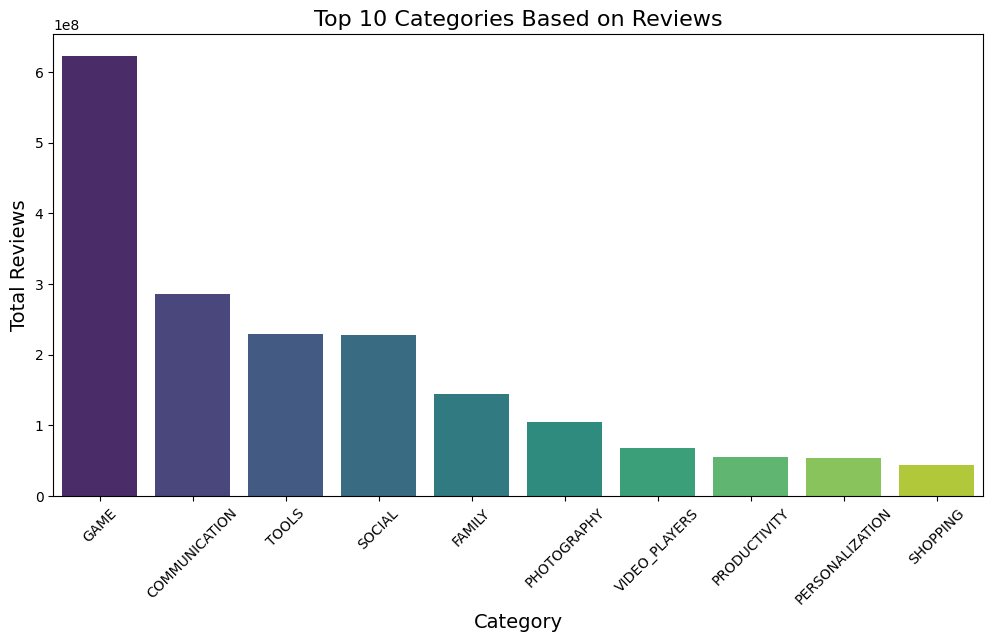

In [ ]:
top_categories = playstore_data.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title('Top 10 Categories Based on Reviews', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.show()



*  We can see caetgory wise top reivews.
*  Categories like Game,social  receive the highest number of reviews, indicating that they are highly popular among users. This suggests that apps within these categories are more likely to attract user attention and generate more engagement.



### **Reviews Dataset**

#### 18.Bar Chart for sentiment distribution


*   Count of apps by sentiment (positive, neutral, negative)



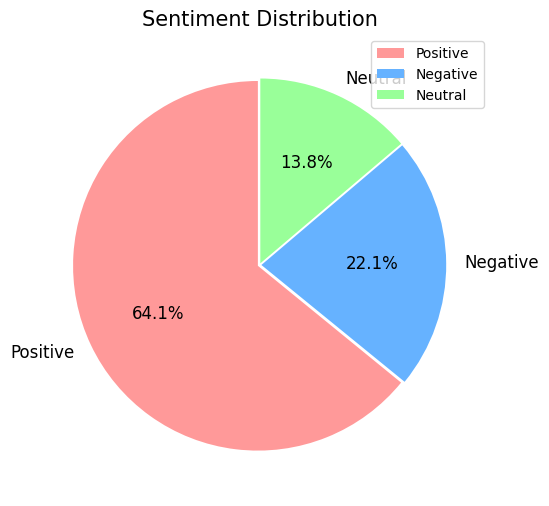

In [95]:
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99']
explode = (0.01, 0.01, 0.01)  # Slightly separate the slices

# Creating the pie chart
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12})

# Adding the title
plt.title('Sentiment Distribution', fontsize=15)
plt.legend()
# Displaying the plot
plt.show()



*  The graph shows that most apps receive positive sentiment, indicating general user satisfaction.

*   the presence of negative sentiment highlights areas for improvement, suggesting opportunities to enhance user experience.

* Neutral sentiment indicates potential for engagement, offering a chance to convert  users into positive ones.






#### 19.Top 10 apps with positive reviews.

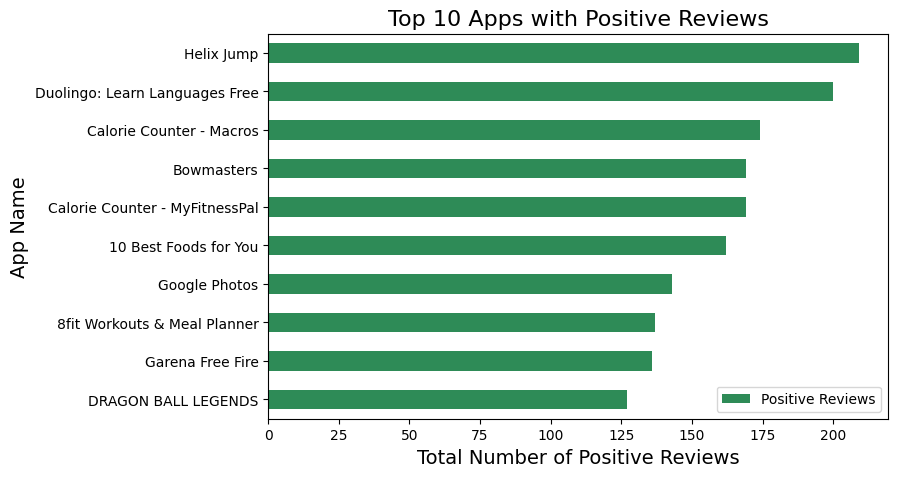

In [96]:
# Group by 'App' and count the number of positive reviews
top_positive_apps = df.groupby('App')['Sentiment'].value_counts().loc[:, 'Positive'].nlargest(10)

# Plot the data as a horizontal bar chart
plt.figure(figsize=(8, 5))
top_positive_apps.plot.barh(color='seagreen')

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Add title and labels
plt.title("Top 10 Apps with Positive Reviews", fontsize=16)
plt.xlabel('Total Number of Positive Reviews', fontsize=14)
plt.ylabel('App Name', fontsize=14)

# Add a legend (optional)
plt.legend(['Positive Reviews'], loc='lower right')

plt.show()


### **Analysis Summary**



1.  **App Categories:**
  *   Categories like 'FAMILY' are highly popular but also face intense competition, while less crowded categories such as 'COMICS' and 'EVENTS' present opportunities for innovation.

2. **Free vs Paid Apps:**

  * 92.2% of apps are free, indicating that developers prefer this model to attract a larger user base, with revenue often generated through ads.

  *  Paid apps remain a niche segment (only 7.8%), mainly targeting users willing to pay for premium features


3. **App Ratings:**

  *  The 'AUTO_AND_VEHICLES' category leads with the highest average rating (4.58), showing strong user satisfaction, while 'LIBRARIES_AND_DEMO' has the lowest average rating (4.06), suggesting potential quality issues.


4. **User Satisfaction and Quality:**
  *   Majority of ratings fall between 4 and 4.5 stars, signaling positive user feedback. Developers should continue focusing on maintaining high app quality and addressing user complaints for improvement.



5. **Rating Variability:**
  * The box plot analysis indicates that some categories have higher consistency in ratings, while others show more variation, highlighting areas for improvement.

6.  **Target Audience:**
 * The majority of apps target "Everyone", showing a broad appeal across all age groups, which is a significant marketing strategy.
7.  **Sentiment Insight:**
  * Positive sentiment prevails across most apps, confirming general user satisfaction. However, negative sentiment presents opportunities for app improvements, while neutral sentiment indicates potential for user engagement growth.
8. **Pricing Insights:**
 * The majority of apps are priced between 0 to 50 dollars, with 'Golfshot Plus: Golf GPS' being the highest-priced. This suggests that developers should consider competitive pricing strategies to attract customers while offering value.
9. **Reviews and User Engagement:**

 * Categories like 'Game' and 'Social' generate the highest number of reviews, indicating that they are popular and drive significant user engagement. This highlights the importance of user feedback for further improvement.





 overall analysis reveals that apps with positive user ratings, high install counts, and competitive pricing are more likely to succeed. Developers should focus on app quality, innovation in underrepresented genres, and fostering user engagement through continuous improvements.













# **Conclusion -**




* From the above analysis on the playstore data shows the key factors influece the user engagement on the app.
*  Free apps are significantly more popular than paid apps, with higher installation numbers, showing user preference for free content.

*  The Games category has the highest number of installations, making it the most engaging and widely-used category on the platform.
*  64.1% of reviews are positive, indicating that most apps are meeting or exceeding user expectations.

* Apps with negative reviews require attention to improve their quality and address user concerns about features and functionality.

* The average rating of 4.1 reflects the high quality and reliability of apps available in the Play Store.
* A majority of apps target the "Everyone" category, showcasing a focus on inclusivity and catering to users of all age groups.


These insights emphasize the importance of focusing on free apps, improving quality in negatively reviewed apps, and leveraging the popularity of the Games category to drive engagement.


